## Classification: Detect Pipe or Rock with Sonar Data

Classification of Rock or Mine with [sonar data](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)). Sonar (sound navigation and ranging) uses sound waves to detect objects, similar to how a bat uses echo-location to navigate, and detect objects. It is the same principle with seismic data for non-invasive underground exploration of geologic formations to locate oil or gas reserves.

```python
url = 'http://apmonitor.com/pds/uploads/Main/sonar_detection.txt'
```

The data set of sonar is taken from different angles and locations to detect the rock or pipe. The data was collected in a laboratory under controlled conditions as a case study for detecting underground pipe. There are 111 labeled sets for the metal cyclinder (pipe) and 97 sonar patterns from rocks with similar conditions. Each sample is a set of 60 numbers between 0 and 1 that represents the integrated energy within a distinct frequency band and for a given time period.

[Pipe / Rock Sonar Case Study](https://apmonitor.com/pds/index.php/Main/SonarDetection) on [Machine Learning for Engineers](https://apmonitor.com/pds/index.php/Main/SonarDetection)

Although this case study is specifc to detecting differences between metal pipe and rock, it is similar to detection of other underground features such as tunnels, mines, aquifers, and fluid-filled pipelines.

<img align=left width=400px src='https://apmonitor.com/pds/uploads/Main/sonar_detection.png'>

### Import Packages

Import *pandas*, *matplotlib*, and other packages needed for this exercise. These are amoung the [several common packages](https://apmonitor.com/pds/index.php/Main/InstallPythonPackages) used in Data Science to import, visualize, cleanse data, perform classification, and analyze the results.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix


### Read Data

Read data as a Pandas dataframe with `data=pd.read_csv(url)`. Show 10 random rows with `data.sample(10)`. There is additional information on [data importing](https://apmonitor.com/pds/index.php/Main/GatherData).

In [100]:
url = 'http://apmonitor.com/pds/uploads/Main/sonar_detection.txt'
data = pd.read_csv(url)
column_names = df.columns.tolist()

data.sample(10)



,Ang1,Ang2,Ang3,Ang4,Ang5,Ang6,Ang7,Ang8,Ang9,Ang10,...,Ang52,Ang53,Ang54,Ang55,Ang56,Ang57,Ang58,Ang59,Ang60,Class
43,0.0093,0.0269,0.0217,0.0339,0.0305,0.1172,0.1450,0.0638,0.0740,0.1360,...,0.0212,0.0091,0.0056,0.0086,0.0092,0.0070,0.0116,0.0060,0.0110,R
111,0.0530,0.0885,0.1997,0.2604,0.3225,0.2247,0.0617,0.2287,0.0950,0.0740,...,0.0244,0.0199,0.0257,0.0082,0.0151,0.0171,0.0146,0.0134,0.0056,M
107,0.0428,0.0555,0.0708,0.0618,0.1215,0.1524,0.1543,0.0391,0.0610,0.0113,...,0.0142,0.0179,0.0079,0.0060,0.0131,0.0089,0.0084,0.0113,0.0049,M
88,0.0274,0.0242,0.0621,0.0560,0.1129,0.0973,0.1823,0.1745,0.1440,0.1808,...,0.0113,0.0108,0.0085,0.0047,0.0074,0.0104,0.0161,0.0220,0.0173,R
91,0.0253,0.0808,0.0507,0.0244,0.1724,0.3823,0.3729,0.3583,0.3429,0.2197,...,0.0178,0.0073,0.0079,0.0038,0.0116,0.0033,0.0039,0.0081,0.0053,R
56,0.0152,0.0102,0.0113,0.0263,0.0097,0.0391,0.0857,0.0915,0.0949,0.1504,...,0.0049,0.0041,0.0036,0.0013,0.0046,0.0037,0.0011,0.0034,0.0033,R
29,0.0189,0.0308,0.0197,0.0622,0.0080,0.0789,0.1440,0.1451,0.1789,0.2522,...,0.0038,0.0096,0.0142,0.0190,0.0140,0.0099,0.0092,0.0052,0.0075,R
54,0.0132,0.0080,0.0188,0.0141,0.0436,0.0668,0.0609,0.0131,0.0899,0.0922,...,0.0044,0.0028,0.0021,0.0022,0.0048,0.0138,0.0140,0.0028,0.0064,R
146,0.1021,0.0830,0.0577,0.0627,0.0635,0.1328,0.0988,0.1787,0.1199,0.1369,...,0.0709,0.0317,0.0309,0.0252,0.0087,0.0177,0.0214,0.0227,0.0106,M
26,0.0151,0.0320,0.0599,0.1050,0.1163,0.1734,0.1679,0.1119,0.0889,0.1205,...,0.0061,0.0015,0.0084,0.0128,0.0054,0.0011,0.0019,0.0023,0.0062,R


### Data Visualization

Create plots to visualize the data. Below are a few sample plots as shown in [Data Visualization](https://apmonitor.com/pds/index.php/Main/VisualizeData).

Create a box plot.

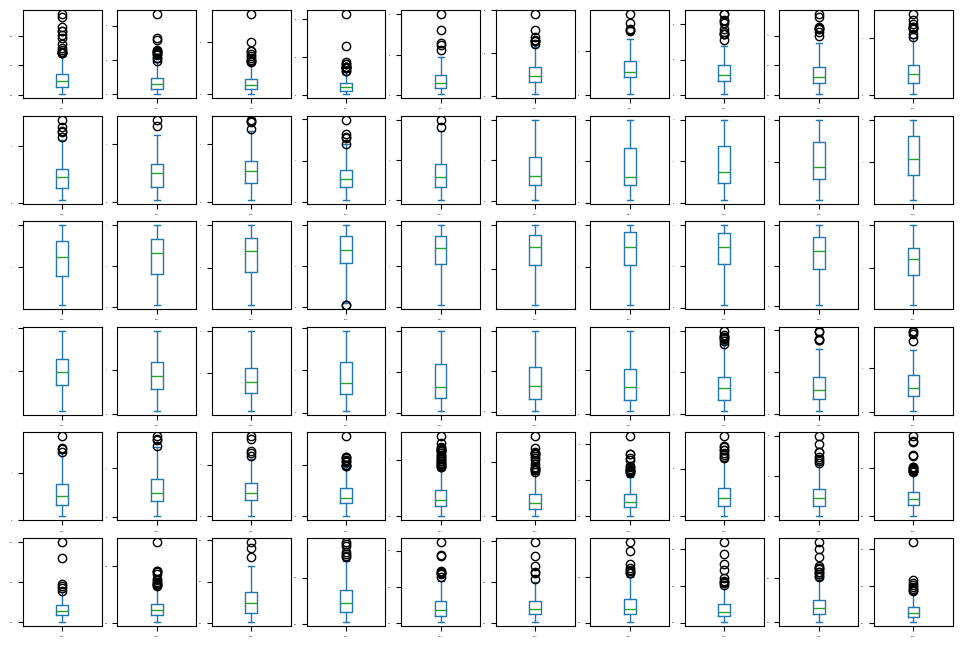

In [3]:
data.plot(kind='box', subplots=True, layout=(6,10),\
             sharex=False, legend=False, fontsize=1, \
             figsize=(12,8))
plt.show()

Show the grouping by `Class`.

In [4]:
data.groupby('Class').size()

,0
Class,
M,111
R,97


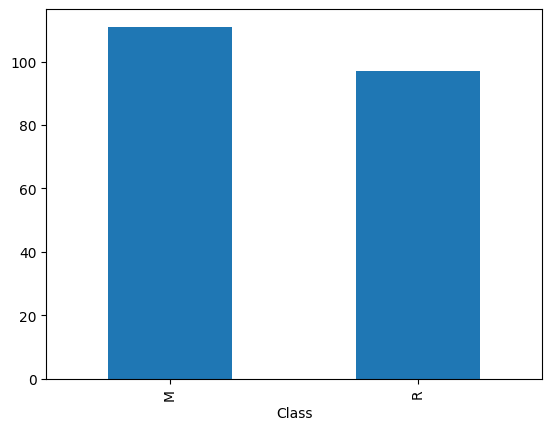

In [5]:
data['Class'].value_counts().plot(kind='bar')
plt.show()

Generate a Correlation Matrix

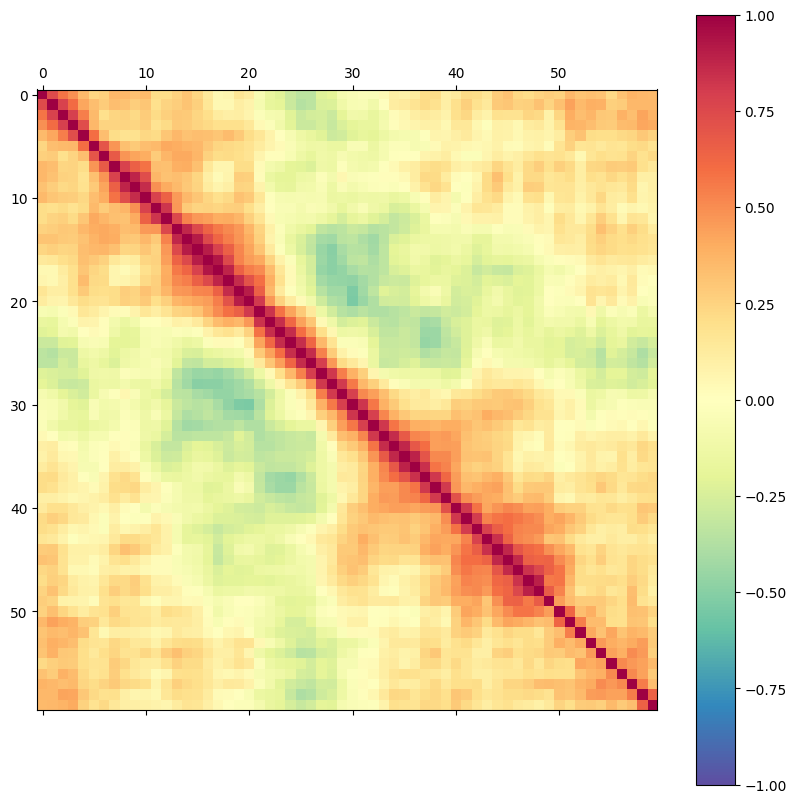

In [11]:
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.drop('Class', axis=1).corr(), vmin=-1, vmax=1, cmap=cm.Spectral_r, interpolation='none')
fig.colorbar(cax)
fig.set_size_inches(10,10)
plt.savefig('sonar_correlation.png')
plt.show()

Generate a Density Plot

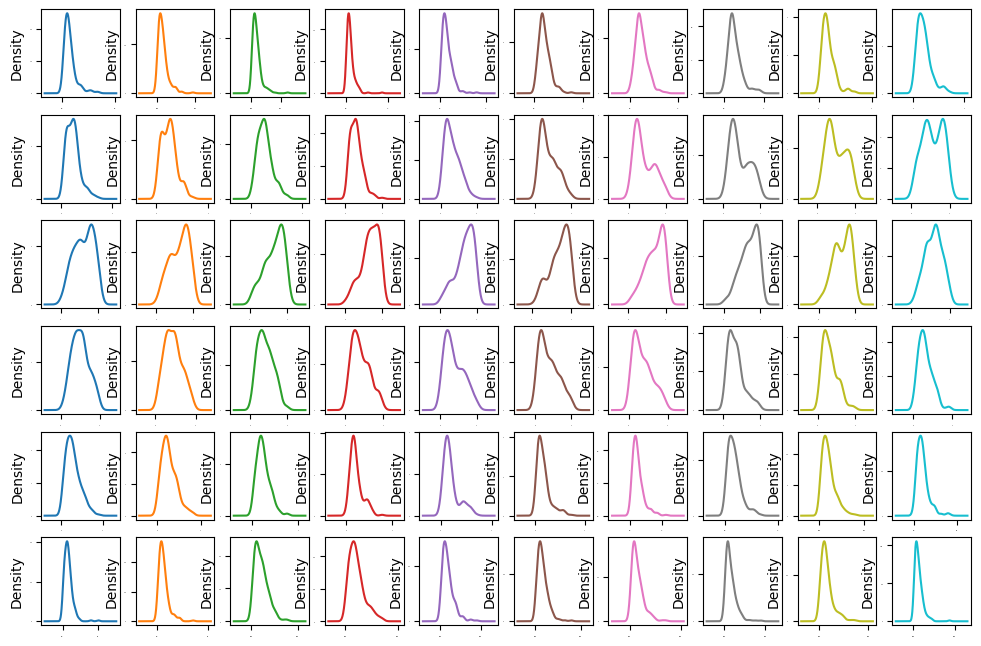

In [15]:
data.drop('Class', axis=1).plot(kind='density', subplots=True, layout=(6,10),\
             sharex=False, legend=False, fontsize=1, \
             figsize=(12,8))
plt.show()

Generate a Histogram

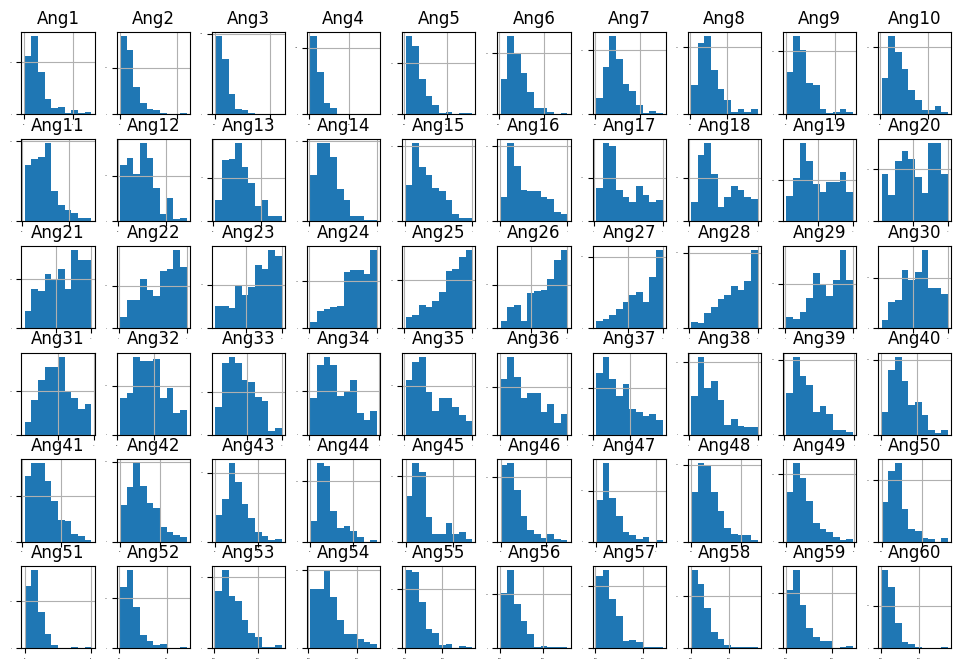

In [8]:
data.hist(sharex=False, sharey=False, layout=(6,10),\
        xlabelsize=1, ylabelsize=1, figsize=(12,8))
plt.show()

Additional data visualization to identify outliers, feature correlation, and any data quality issues.

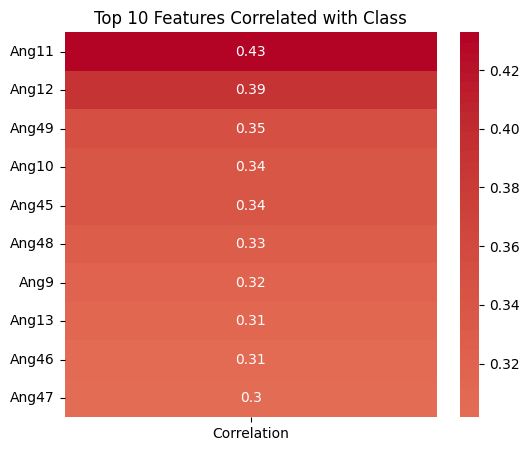

In [105]:
data['class_numeric'] = data['Class'].map({'M': 1, 'R': 0})
data_n = data.drop('Class',axis=1)

# 2. Compute correlation of all features with the class
correlations = data_n.corr()['class_numeric'].drop('class_numeric')

# 3. Select the top N features by absolute correlation
top_n = 10  # you can change this number
top_features = correlations.abs().sort_values(ascending=False).head(top_n).index

# 4. Subset the data for the heatmap
top_corrs = df[top_features].corrwith(data_n['class_numeric']).to_frame(name='Correlation')

# 5. Plot heatmap
plt.figure(figsize=(6, top_n * 0.5))
sns.heatmap(top_corrs, annot=True, cmap='coolwarm', center=0)
plt.title(f'Top {top_n} Features Correlated with Class')
plt.show()



What insights do you gain from the data visualization and exploration? In particular, comment on the presence of uniform data distributions, outliers, missing data, and other data quality issues.

### Scale Data

Scale data with a [Standard Scalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) so that all features (sonar returns) are scaled.

In [26]:
scaler = StandardScaler()
datas = scaler.fit_transform(data.drop('Class', axis=1))

print(datas)

[[-0.39955135 -0.04064823 -0.02692565 ...  0.06987027  0.17167808
  -0.65894689]
 [ 0.70353822  0.42163039  1.05561832 ... -0.47240644 -0.44455424
  -0.41985233]
 [-0.12922901  0.60106749  1.72340448 ...  1.30935987  0.25276128
   0.25758223]
 ...
 [ 1.00438083  0.16007801 -0.67384349 ...  0.90652575 -0.03913824
  -0.67887143]
 [ 0.04953255 -0.09539176  0.13480381 ... -0.00759783 -0.70402047
  -0.34015415]
 [-0.13794908 -0.06497869 -0.78861924 ... -0.6738235  -0.29860448
   0.99479044]]


### Best Features

What are the factors that are most correlated or influential for predicting pipe versus rock. Use the `SelectKBest` package to produce a ranked list.

In [137]:
selector = SelectKBest(score_func=f_classif, k='all')  # get all scores

selector.fit(datas, data['Class'])
scores = selector.scores_

feature_scores = pd.DataFrame({
    'Feature': column_names,
    'Score': scores
})

feature_scores = feature_scores.sort_values(by='Score', ascending=False)

feature_scores

feature_use = feature_scores['Feature'].head(40)

print(feature_use)

data_sub = data[feature_use]

data_sub.head()

datas_sub = pd.DataFrame(datas,columns=column_names)

datas_sub.head()




10    Ang11
11    Ang12
48    Ang49
9     Ang10
44    Ang45
47    Ang48
8      Ang9
12    Ang13
45    Ang46
46    Ang47
50    Ang51
51    Ang52
43    Ang44
0      Ang1
35    Ang36
3      Ang4
20    Ang21
42    Ang43
1      Ang2
34    Ang35
19    Ang20
4      Ang5
36    Ang37
21    Ang22
2      Ang3
7      Ang8
57    Ang58
53    Ang54
49    Ang50
33    Ang34
13    Ang14
41    Ang42
52    Ang53
18    Ang19
5      Ang6
58    Ang59
55    Ang56
22    Ang23
6      Ang7
30    Ang31
Name: Feature, dtype: object


,Ang1,Ang2,Ang3,Ang4,Ang5,Ang6,Ang7,Ang8,Ang9,Ang10,...,Ang51,Ang52,Ang53,Ang54,Ang55,Ang56,Ang57,Ang58,Ang59,Ang60
0,-0.399551,-0.040648,-0.026926,-0.715105,0.364456,-0.101253,0.521638,0.297843,1.125272,0.021186,...,0.595283,-1.115432,-0.597604,0.680897,-0.295646,1.481635,1.763784,0.069870,0.171678,-0.658947
1,0.703538,0.421630,1.055618,0.323330,0.777676,2.607217,1.522625,2.510982,1.318325,0.588706,...,-0.297902,-0.522349,-0.256857,-0.843151,0.015503,1.901046,1.070732,-0.472406,-0.444554,-0.419852
2,-0.129229,0.601067,1.723404,1.172176,0.400545,2.093337,1.968770,2.852370,3.232767,3.066105,...,-1.065875,1.017585,0.836373,-0.197833,1.231812,2.827246,4.120162,1.309360,0.252761,0.257582
3,-0.835555,-0.648910,0.481740,-0.719414,-0.987079,-1.149364,-0.193816,-0.084747,-1.000852,-0.610469,...,0.670411,-0.137365,-1.009341,0.557326,-0.111785,-0.161060,-0.488635,-0.549875,-0.639154,1.034640
4,2.050790,0.856537,0.111327,-0.312227,-0.292365,-0.672796,-0.013735,1.317299,1.510531,1.772220,...,-0.039129,-1.073812,-0.753780,-0.060532,0.241793,-1.174638,-0.107456,-0.487900,0.447361,0.576375


### Train / Test Split

Split the data into **Test** and **Train** sets. Randomly select values that split the data into a train (80%) and test (20%) set by using the sklearn `train_test_split` with `shuffle=True`.

In [138]:
X_train, X_test, y_train, y_test = train_test_split(datas_sub[feature_use], data['Class'], test_size=0.2, shuffle=True)




### Import Classifier Packages

Classification: Use 8 classification methods. Possible regression methods are:

- AdaBoost
- Logistic Regression
- Naïve Bayes
- Stochastic Gradient Descent
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- Support Vector Classifier
- Deep Learning Neural Network

The [Scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) has additional information on classifiers.

In [54]:
# Ensemble Methods
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# Linear Models
from sklearn.linear_model import LogisticRegression, SGDClassifier

# Naïve Bayes
from sklearn.naive_bayes import GaussianNB  # most common version

# Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Tree
from sklearn.tree import DecisionTreeClassifier

# Support Vector Machine
from sklearn.svm import SVC


### Initialize Classifiers

In [119]:
# 1. AdaBoost
ada = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

# 2. Logistic Regression
logreg = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    random_state=42
)

# 3. Naïve Bayes
nb = GaussianNB()

# 4. Stochastic Gradient Descent
sgd = SGDClassifier(
    loss='log_loss',      # logistic regression behavior
    max_iter=1000,
    random_state=42
)

# 5. K-Nearest Neighbors
knn = KNeighborsClassifier(
    n_neighbors=10
)

# 6. Decision Tree
dt = DecisionTreeClassifier(
    max_depth=None,
    random_state=42
)

# 7. Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# 8. Support Vector Classifier
svc = SVC(
    kernel='rbf',
    C=1.0,
    probability=True,
    random_state=42
)


### Train Classifiers

In [139]:
model0 = ada.fit(X_train,y_train)
y_pred0 = model0.predict(X_test)

model1 = logreg.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)

model2 = nb.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

model3 = sgd.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

model4 = knn.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)

model5 = dt.fit(X_train,y_train)
y_pred5 = model5.predict(X_test)

model6 = rf.fit(X_train,y_train)
y_pred6 = model6.predict(X_test)

model7 = svc.fit(X_train,y_train)
y_pred7 = model7.predict(X_test)


### Show Confusion Matrix Result

A confusion matrix shows true positive, false positive, true negative, and false negative groups from the test set.

```python
from sklearn.metrics import ConfusionMatrixDisplay
```

Generate a confusion matrix for each classifier.

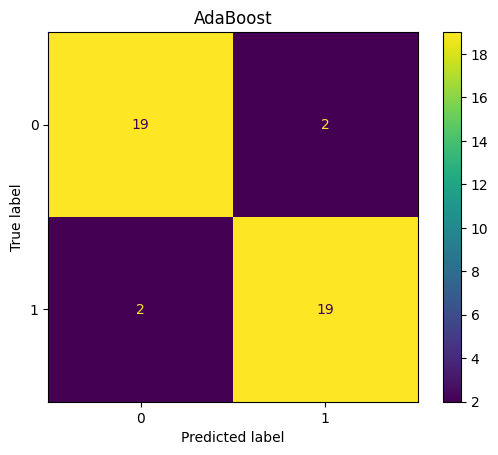

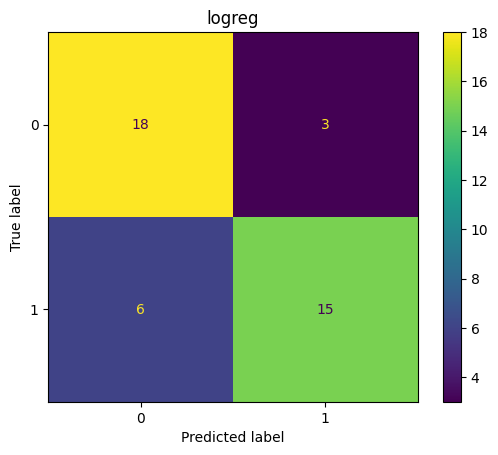

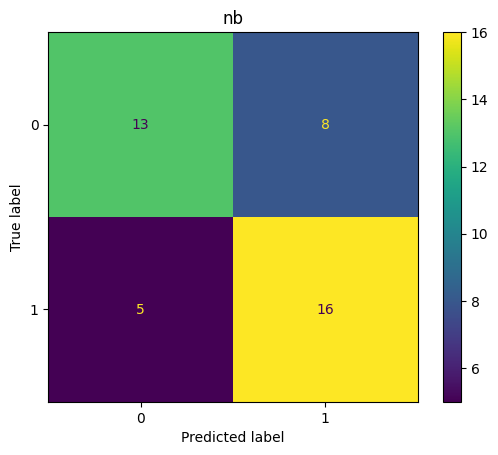

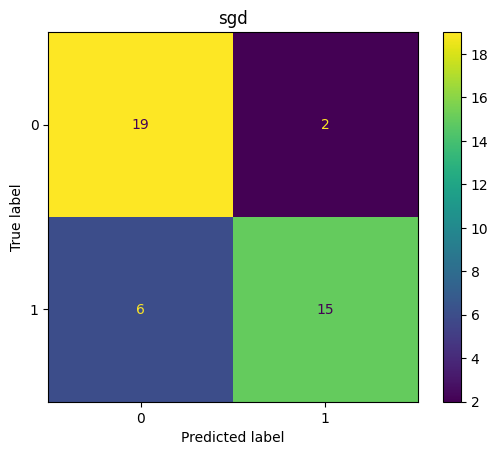

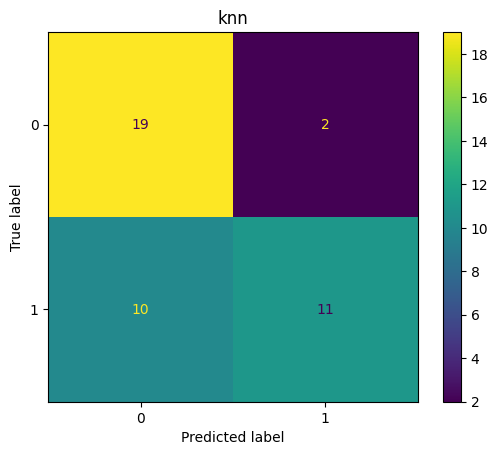

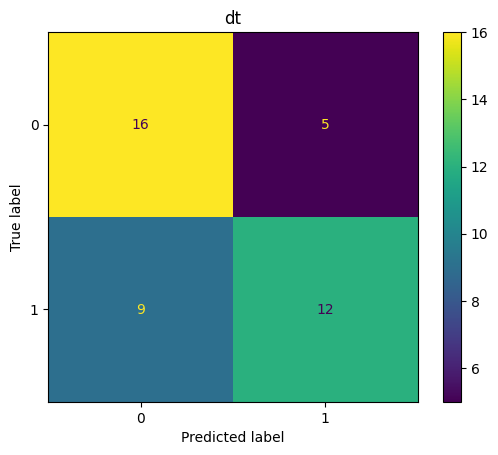

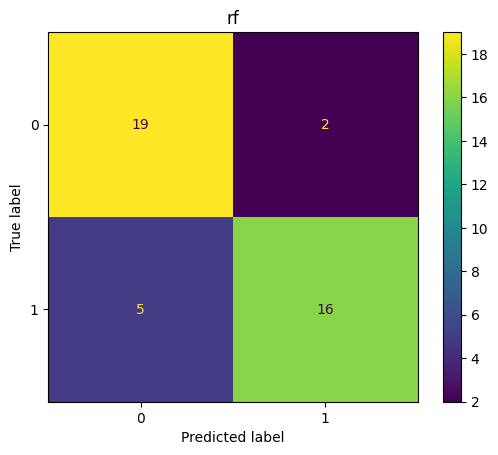

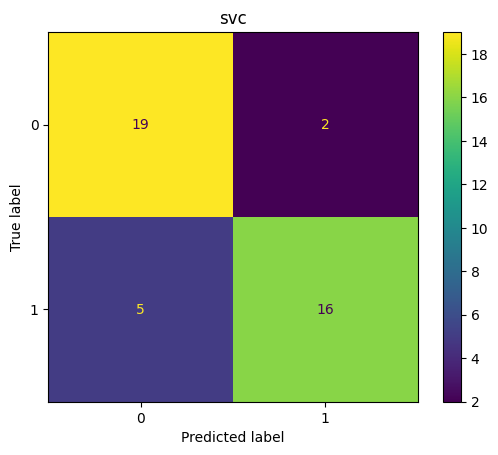

In [140]:
from sklearn.metrics import ConfusionMatrixDisplay

cm0 = confusion_matrix(y_test, y_pred0)
disp = ConfusionMatrixDisplay(confusion_matrix=cm0)
disp.plot()
plt.title('AdaBoost')
plt.show()

cm1 = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.title('logreg')
plt.show()

cm2 = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.title('nb')
plt.show()

cm3 = confusion_matrix(y_test, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot()
plt.title('sgd')
plt.show()

cm4 = confusion_matrix(y_test, y_pred4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4)
disp.plot()
plt.title('knn')
plt.show()

cm5 = confusion_matrix(y_test, y_pred5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm5)
disp.plot()
plt.title('dt')
plt.show()

cm6 = confusion_matrix(y_test, y_pred6)
disp = ConfusionMatrixDisplay(confusion_matrix=cm6)
disp.plot()
plt.title('rf')
plt.show()

cm7 = confusion_matrix(y_test, y_pred7)
disp = ConfusionMatrixDisplay(confusion_matrix=cm7)
disp.plot()
plt.title('svc')
plt.show()




In [86]:
#print(y_pred7)
y_testnp = y_test.to_numpy()
A = 0
B = 0
C = 0
D = 0
for i in range(len(y_pred7)):

    if y_pred7[i] == "M" and y_testnp[i] == "M":
      A+=1
    elif y_pred7[i] == "R" and y_testnp[i] == "R":
      B+=1
    elif y_pred7[i]=="M" and y_testnp[i] == "R":
      C+=1
    elif y_pred7[i]=="R" and y_testnp[i] == "M":
      D+=1
print(A,B,C,D)

print(cm7)

20 11 8 3
[[20  3]
 [ 8 11]]


### Interpretation of Results

Write an executive summary (max 2 page report) on the result of the classifiers from the sonar data set. Report the confusion matrix in the test set. What are recommendations to detect pipe versus rock?